In [90]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler,NearMiss
from imblearn.over_sampling import RandomOverSampler

from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce

from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score, RandomizedSearchCV

from sklearn.metrics import recall_score

import pickle

In [58]:
data = pd.read_csv('employee-attrition.csv')

In [59]:
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [60]:
data=data[['Age','Department','DistanceFromHome','Gender','HourlyRate','JobInvolvement','JobSatisfaction','MaritalStatus','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','TotalWorkingYears','YearsSinceLastPromotion','WorkLifeBalance','Attrition']
]

In [61]:
data

,Age,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsSinceLastPromotion,WorkLifeBalance,Attrition
0,41,Sales,1,Female,94,3,4,Single,Yes,11,3,1,8,0,1,Yes
1,49,Research & Development,8,Male,61,2,2,Married,No,23,4,4,10,1,3,No
2,37,Research & Development,2,Male,92,2,3,Single,Yes,15,3,2,7,0,3,Yes
3,33,Research & Development,3,Female,56,3,3,Married,Yes,11,3,3,8,3,3,No
4,27,Research & Development,2,Male,40,3,2,Married,No,12,3,4,6,2,3,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,23,Male,41,4,4,Married,No,17,3,3,17,0,3,No
1466,39,Research & Development,6,Male,42,2,1,Married,No,15,3,1,9,1,3,No
1467,27,Research & Development,4,Male,87,4,2,Married,Yes,20,4,2,6,0,3,No
1468,49,Sales,2,Male,63,2,2,Married,No,14,3,4,17,0,2,No


# EDA

In [36]:
data.isna().sum()

Age                         0
Department                  0
DistanceFromHome            0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobSatisfaction             0
MaritalStatus               0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
TotalWorkingYears           0
YearsSinceLastPromotion     0
WorkLifeBalance             0
Attrition                   0
dtype: int64

In [37]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
IQR = q3-q1

In [38]:
((data < (q1-1.5*IQR)) | (data > (q3+1.5*IQR))).sum()/len(data)*100

Age                          0.000000
Attrition                    0.000000
Department                   0.000000
DistanceFromHome             0.000000
Gender                       0.000000
HourlyRate                   0.000000
JobInvolvement               0.000000
JobSatisfaction              0.000000
MaritalStatus                0.000000
OverTime                     0.000000
PercentSalaryHike            0.000000
PerformanceRating           15.374150
RelationshipSatisfaction     0.000000
TotalWorkingYears            4.285714
WorkLifeBalance              0.000000
YearsSinceLastPromotion      7.278912
dtype: float64

In [39]:
data.describe()

,Age,DistanceFromHome,HourlyRate,JobInvolvement,JobSatisfaction,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsSinceLastPromotion,WorkLifeBalance
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,65.891156,2.729932,2.728571,15.209524,3.153741,2.712245,11.279592,2.187755,2.761224
std,9.135373,8.106864,20.329428,0.711561,1.102846,3.659938,0.360824,1.081209,7.780782,3.222430,0.706476
min,18.000000,1.000000,30.000000,1.000000,1.000000,11.000000,3.000000,1.000000,0.000000,0.000000,1.000000
25%,30.000000,2.000000,48.000000,2.000000,2.000000,12.000000,3.000000,2.000000,6.000000,0.000000,2.000000
50%,36.000000,7.000000,66.000000,3.000000,3.000000,14.000000,3.000000,3.000000,10.000000,1.000000,3.000000
75%,43.000000,14.000000,83.750000,3.000000,4.000000,18.000000,3.000000,4.000000,15.000000,3.000000,3.000000
max,60.000000,29.000000,100.000000,4.000000,4.000000,25.000000,4.000000,4.000000,40.000000,15.000000,4.000000


In [40]:
data.describe(exclude='number')

,Department,Gender,MaritalStatus,OverTime,Attrition
count,1470,1470,1470,1470,1470
unique,3,2,3,2,2
top,Research & Development,Male,Married,No,No
freq,961,882,673,1054,1233


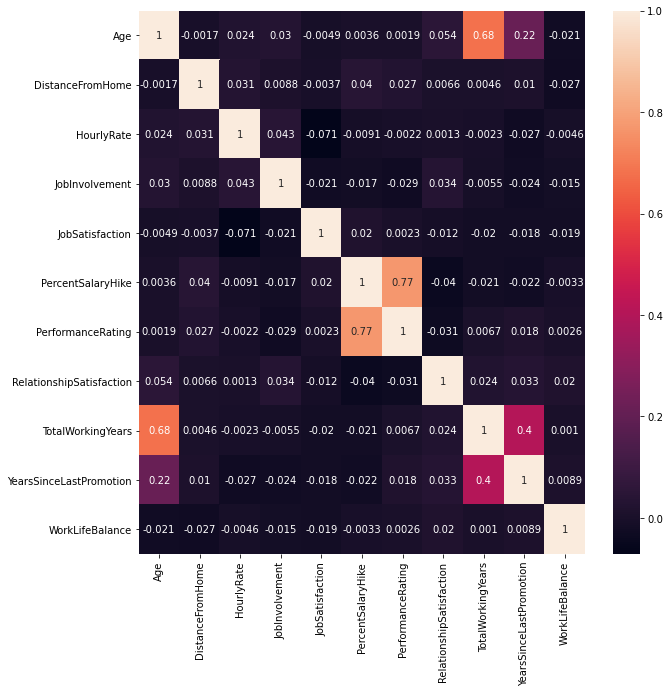

In [41]:
plt.figure(figsize=(10,10))
sns.heatmap(data[['Age','Department','DistanceFromHome','Gender','HourlyRate','JobInvolvement','JobSatisfaction','MaritalStatus','OverTime','PercentSalaryHike','PerformanceRating','RelationshipSatisfaction','TotalWorkingYears','YearsSinceLastPromotion','WorkLifeBalance','Attrition']
].corr(),annot=True)

# **MachineLearning**

**Data**

In [62]:
data['Attrition']=np.where(data['Attrition']=='Yes',1,0)

In [63]:
data

,Age,Department,DistanceFromHome,Gender,HourlyRate,JobInvolvement,JobSatisfaction,MaritalStatus,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,YearsSinceLastPromotion,WorkLifeBalance,Attrition
0,41,Sales,1,Female,94,3,4,Single,Yes,11,3,1,8,0,1,1
1,49,Research & Development,8,Male,61,2,2,Married,No,23,4,4,10,1,3,0
2,37,Research & Development,2,Male,92,2,3,Single,Yes,15,3,2,7,0,3,1
3,33,Research & Development,3,Female,56,3,3,Married,Yes,11,3,3,8,3,3,0
4,27,Research & Development,2,Male,40,3,2,Married,No,12,3,4,6,2,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Research & Development,23,Male,41,4,4,Married,No,17,3,3,17,0,3,0
1466,39,Research & Development,6,Male,42,2,1,Married,No,15,3,1,9,1,3,0
1467,27,Research & Development,4,Male,87,4,2,Married,Yes,20,4,2,6,0,3,0
1468,49,Sales,2,Male,63,2,2,Married,No,14,3,4,17,0,2,0


**Analysis**

* FP : karyawan diprediksi akan Resign tapi actualnya tidak resign
* FN : Karyawan diprediksi tidak resign tapi actualnya Resign 

maka dalam case ini akan menekan FN yang lebih merugikan company kehilangan pegawai
, sehingga mencari modelling dengan nilai **Recall** yang tinggi

**Balancing Data**

In [44]:
data['Attrition'].value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

data tidak balance, untuk itu perlu menggunakan metode balancing agar performa model lebih baik

Preprocessing :
    * Onehot : gender, marital status, Overtime,Department
karena ada data categorical

In [64]:
transformer = ColumnTransformer([
    ('one hot',OneHotEncoder(drop='first'),['Gender','MaritalStatus','OverTime','Department'])
],remainder='passthrough')

**Data Splitting**

In [65]:
X=data.drop(['Attrition'],axis=1)
y=data['Attrition']

In [66]:
X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y,test_size=0.3,random_state=2020)

**Modelling**

>**define model**

In [67]:
logreg = LogisticRegression()
tree = DecisionTreeClassifier(random_state = 2020)
knn = KNeighborsClassifier()
rf = RandomForestClassifier(random_state = 2020)

In [68]:
logreg_pipe = Pipeline([
    ('transform',transformer),
    ('scaler',RobustScaler()),
    ('logreg',logreg)
])

tree_pipe = Pipeline([
    ('transform',transformer),
    ('tree',tree)
])

knn_pipe = Pipeline([
    ('transform',transformer),
    ('scaler',RobustScaler()),
    ('knn',knn)
])

rf_pipe= Pipeline([
    ('transform',transformer),
    ('rf',rf)    
])

>**Cross Validation**

In [69]:
def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv

In [70]:
logreg_pipe_cv = model_evaluation(logreg_pipe, 'recall')
tree_pipe_cv = model_evaluation(tree_pipe, 'recall')
knn_pipe_cv = model_evaluation(knn_pipe, 'recall')
rf_pipe_cv = model_evaluation(rf_pipe, 'recall')

In [71]:
for model in [logreg_pipe, tree_pipe, knn_pipe, rf_pipe]:
    model.fit(X_train, y_train)

In [72]:
score_mean = [logreg_pipe_cv.mean(), tree_pipe_cv.mean(), knn_pipe_cv.mean(),
              rf_pipe_cv.mean()]
score_std = [logreg_pipe_cv.std(), tree_pipe_cv.std(), knn_pipe_cv.std(),
             rf_pipe_cv.std()]
score_recall_score = [recall_score(y_test, logreg_pipe.predict(X_test)),
            recall_score(y_test, tree_pipe.predict(X_test)), 
            recall_score(y_test, knn_pipe.predict(X_test)), 
            recall_score(y_test, rf_pipe.predict(X_test))]
method_name = ['Logistic Regression', 'Decision Tree Classifier',
              'KNN Classifier', 'Random Forest Classifier']
cv_result = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
cv_result

,method,mean score,std score,recall score
0,Logistic Regression,0.223708,0.074206,0.281690
1,Decision Tree Classifier,0.331907,0.082940,0.323944
2,KNN Classifier,0.090374,0.033213,0.154930
3,Random Forest Classifier,0.120677,0.027716,0.140845


Dari data diatas, kita akan pilih model decision tree karna memiliki nilai recall paling tinggi, tapi akan di coba untuk balancing data agar 

# **Imbalance Dataset**

**RandomUnderSampling**

In [73]:
rus = RandomUnderSampler(random_state = 2020)
X_under, y_under = rus.fit_resample(X_train, y_train) 

In [74]:
logreg_pipe_under = Pipeline([
    ('transform',transformer),
    ('scaler',RobustScaler()),
    ('rus',rus),
    ('logreg',logreg)
])

tree_pipe_under = Pipeline([
    ('transform',transformer),
    ('rus',rus),
    ('tree',tree)
])

knn_pipe_under = Pipeline([
    ('transform',transformer),
    ('scaler',RobustScaler()),
    ('rus',rus),
    ('knn',knn)
])

rf_pipe_under = Pipeline([
    ('transform',transformer),
    ('rus',rus),
    ('rf',rf)    
])

In [75]:
def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_under, y_under, cv = skfold, scoring = metric)
    return model_cv

In [76]:
logreg_under_cv = model_evaluation(logreg_pipe_under, 'recall') 
tree_under_cv = model_evaluation(tree_pipe_under, 'recall')
knn_under_cv = model_evaluation(knn_pipe_under, 'recall')
rf_under_cv = model_evaluation(rf_pipe_under, 'recall')

In [77]:
for model in [logreg_pipe_under, tree_pipe_under, knn_pipe_under, rf_pipe_under]:
    model.fit(X_train, y_train)

In [78]:
score_mean = [logreg_under_cv.mean(), tree_under_cv.mean(), knn_under_cv.mean(),
              rf_under_cv.mean()]
score_std = [logreg_under_cv.std(), tree_under_cv.std(), knn_under_cv.std(),
             rf_under_cv.std()]
score_recall_score = [recall_score(y_test, logreg_pipe_under.predict(X_test)),
            recall_score(y_test, tree_pipe_under.predict(X_test)), 
            recall_score(y_test, knn_pipe_under.predict(X_test)), 
            recall_score(y_test, rf_pipe_under.predict(X_test))]
method_name = ['Logistic Regression UnderSampling', 'Decision Tree Classifier UnderSampling',
              'KNN Classifier UnderSampling', 'Random Forest Classifier UnderSampling']
under_result = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
under_result

,method,mean score,std score,recall score
0,Logistic Regression UnderSampling,0.710517,0.042849,0.760563
1,Decision Tree Classifier UnderSampling,0.560963,0.067123,0.690141
2,KNN Classifier UnderSampling,0.475401,0.059803,0.661972
3,Random Forest Classifier UnderSampling,0.620499,0.030337,0.760563


**RandomOverSampling**

In [80]:
ros = RandomOverSampler(random_state = 2020)
X_over, y_over = ros.fit_resample(X_train, y_train) 

In [84]:
logreg_pipe_over = Pipeline([
    ('transform',transformer),
    ('scaler',RobustScaler()),
    ('ros',ros),
    ('logreg',logreg)
])

tree_pipe_over = Pipeline([
    ('transform',transformer),
    ('ros',ros),
    ('tree',tree)
])

knn_pipe_over = Pipeline([
    ('transform',transformer),
    ('scaler',RobustScaler()),
    ('ros',ros),
    ('knn',knn)
])

rf_pipe_over = Pipeline([
    ('transform',transformer),
    ('ros',ros),
    ('rf',rf)   
])

In [85]:
def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_over, y_over, cv = skfold, scoring = metric)
    return model_cv

In [86]:
logreg_over_cv = model_evaluation(logreg_pipe_over, 'recall') 
tree_over_cv = model_evaluation(tree_pipe_over, 'recall')
knn_over_cv = model_evaluation(knn_pipe_over, 'recall')
rf_over_cv = model_evaluation(rf_pipe_over, 'recall')

In [87]:
for model in [logreg_pipe_over, tree_pipe_over, knn_pipe_over, rf_pipe_over]:
    model.fit(X_train, y_train)

In [88]:
score_mean = [logreg_over_cv.mean(), tree_over_cv.mean(), knn_over_cv.mean(),
              rf_over_cv.mean()]
score_std = [logreg_over_cv.std(), tree_over_cv.std(), knn_over_cv.std(),
             rf_over_cv.std()]
score_recall_score = [recall_score(y_test, logreg_pipe_over.predict(X_test)),
            recall_score(y_test, tree_pipe_over.predict(X_test)), 
            recall_score(y_test, knn_pipe_over.predict(X_test)), 
            recall_score(y_test, rf_pipe_over.predict(X_test))]
method_name = ['Logistic Regression OverSampling', 'Decision Tree Classifier OverSampling',
              'KNN Classifier OverSampling', 'Random Forest Classifier OverSampling']
Over_result = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
Over_result

,method,mean score,std score,recall score
0,Logistic Regression OverSampling,0.738056,0.030642,0.760563
1,Decision Tree Classifier OverSampling,1.000000,0.000000,0.309859
2,KNN Classifier OverSampling,0.915452,0.021384,0.549296
3,Random Forest Classifier OverSampling,1.000000,0.000000,0.225352


**NearMiss**

In [91]:
nm = NearMiss(version = 1)

In [92]:
logreg_pipe_nm = Pipeline([
    ('transform',transformer),
    ('scaler',RobustScaler()),
    ('nm',nm),
    ('logreg',logreg)
])

tree_pipe_nm = Pipeline([
    ('transform',transformer),
    ('nm',nm),
    ('tree',tree)
])

knn_pipe_nm = Pipeline([
    ('transform',transformer),
    ('scaler',RobustScaler()),
    ('nm',nm),
    ('knn',knn)
])

rf_pipe_nm = Pipeline([
    ('transform',transformer),
    ('nm',nm),
    ('rf',rf)   
])

In [94]:
def model_evaluation(model, metric):
    skfold = StratifiedKFold(n_splits = 5)
    model_cv = cross_val_score(model, X_train, y_train, cv = skfold, scoring = metric)
    return model_cv

In [95]:
logreg_nm_cv = model_evaluation(logreg_pipe_nm, 'recall') 
tree_nm_cv = model_evaluation(tree_pipe_nm, 'recall')
knn_nm_cv = model_evaluation(knn_pipe_nm, 'recall')
rf_nm_cv = model_evaluation(rf_pipe_nm, 'recall')

In [96]:
for model in [logreg_pipe_nm, tree_pipe_nm, knn_pipe_nm, rf_pipe_nm]:
    model.fit(X_train, y_train)

In [97]:
score_mean = [logreg_nm_cv.mean(), tree_nm_cv.mean(), knn_nm_cv.mean(),
              rf_nm_cv.mean()]
score_std = [logreg_nm_cv.std(), tree_nm_cv.std(), knn_nm_cv.std(),
             rf_nm_cv.std()]
score_recall_score = [recall_score(y_test, logreg_pipe_nm.predict(X_test)),
            recall_score(y_test, tree_pipe_nm.predict(X_test)), 
            recall_score(y_test, knn_pipe_nm.predict(X_test)), 
            recall_score(y_test, rf_pipe_nm.predict(X_test))]
method_name = ['Logistic Regression NearMiss', 'Decision Tree Classifier NearMiss',
              'KNN Classifier NearMiss', 'Random Forest Classifier NearMiss']
Over_result = pd.DataFrame({
    'method': method_name,
    'mean score': score_mean,
    'std score': score_std,
    'recall score': score_recall_score
})
Over_result

,method,mean score,std score,recall score
0,Logistic Regression NearMiss,0.681640,0.090194,0.788732
1,Decision Tree Classifier NearMiss,0.650624,0.067783,0.647887
2,KNN Classifier NearMiss,0.487879,0.069367,0.521127
3,Random Forest Classifier NearMiss,0.747950,0.137353,0.746479


dari 3 metode diatas, model yg baik dan pling stabil adalh logistic regression, mk untuk tunning akn di gunakan model dr logreg dengn methode oversampling karna mean score nya tinggi

# Hyperparameter tunning

In [98]:
estimator = Pipeline([
    ('transform',transformer),
    ('scaler',RobustScaler()),
    ('ros',ros),
    ('model',logreg)
])

hyperparam_space = {
    'model__C': [100, 10, 1, 0.1, 0.01, 0.001],
    'model__solver': ['liblinear', 'newton-cg']
}

random = RandomizedSearchCV(
                estimator,
                param_distributions = hyperparam_space,
                cv = StratifiedKFold(n_splits = 5),
                scoring = 'recall',
                n_iter = 10,
                n_jobs = -1)

random.fit(X_train, y_train)

print('best score', random.best_score_)
print('best param', random.best_params_)

best score 0.7830659536541889
best param {'model__solver': 'liblinear', 'model__C': 0.01}


In [99]:
random.best_estimator_.fit(X_train, y_train)
y_predict = random.best_estimator_.predict(X_test)
recall_score(y_test, y_predict)

0.7887323943661971